<a href="https://colab.research.google.com/github/Sarathismg/IST526_Assignment_5/blob/main/Q5_Topic_Modeling_with_LDA_Gensim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Essential Libraries

In [ ]:
import numpy as np
import pandas as pd

# Plotting tools
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


## Import Plotly

In [ ]:
# Using plotly.express
import plotly.express as px
import plotly.graph_objects as go

## Natural Language Processing (NLP) Libraries


In [ ]:
import re
from pprint import pprint

import csv
import string

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# spacy for lemmatization
import spacy


### Gensim package

In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import Word2Vec

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

### pyLDAVis package

In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=ed2f1bc8cbb7ffbc635142a0b4506b99c287d1f48ace7e4ad645e219630c87f5
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


### NLTK Package

In [ ]:
# NLTK Stop words
import nltk
nltk.download("stopwords")
# nltk.download()

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 

/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Mount Google Drive

In [ ]:
import os

# mount drive
from google.colab import drive
drive.mount('/content/drive')


# edit this path if needed
my_path = '/content/drive/My Drive/Colab Notebooks/'
# my_path = '/content/drive/My Drive/NLP Code/'

# change to this path
os.chdir(my_path)

# verify present working directory. It should be identical to 'my_path'
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


# Import Text Data

In [ ]:
cd ../

/content/drive/MyDrive


In [ ]:
df = pd.read_csv('data/news_articles.csv', encoding='latin-1')
display(df.head())
display(df.tail())

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


,Article,Date,Heading,NewsType
2687,strong>DUBAI: Dubai International Airport and ...,3/25/2017,Laptop ban hits Dubai for 11m weekend traveller,business
2688,"strong>BEIJING: Former Prime Minister, Shaukat...",3/26/2017,Pak China relations not against any third coun...,business
2689,strong>WASHINGTON: Uber has grounded its fleet...,3/26/2017,Uber grounds self driving cars after accid,business
2690,strong>BEIJING: The New Development Bank plans...,3/27/2017,New Development Bank plans joint investments i...,business
2691,strong>KARACHI: Karachi-based technology incub...,3/27/2017,Google powered Startup Weekend energizing prou...,business


# Tokenize: Parse each sentence to words/terms/tokens

In [ ]:
df['token'] = df['Article'].apply (lambda x: gensim.utils.simple_preprocess(str(x), deacc=True))
display(df.head())

,Article,Date,Heading,NewsType,token
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business,"[karachi, the, sindh, government, has, decided..."
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business,"[hong, kong, asian, markets, started, on, an, ..."
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business,"[hong, kong, hong, kong, shares, opened, perce..."
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business,"[hong, kong, asian, markets, tumbled, tuesday,..."
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business,"[new, york, us, oil, prices, monday, slipped, ..."


# Making Bigram and Trigram models

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(df['token'], min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[df['token']], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


# Remove Stop words

## Define stop word removal functions

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    nlp = spacy.load('en', disable=['parser', 'ner'])
    
    # allowed_list = ['jaws']
    """https://spacy.io/api/annotation"""
    
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
        #texts_out.append([token for token in doc if token.pos_ in allowed_postags])
    return texts_out

## Now, use stop word removal functions

In [ ]:
display('before: ', df['token'].head())

'before: '

0    [karachi, the, sindh, government, has, decided...
1    [hong, kong, asian, markets, started, on, an, ...
2    [hong, kong, hong, kong, shares, opened, perce...
3    [hong, kong, asian, markets, tumbled, tuesday,...
4    [new, york, us, oil, prices, monday, slipped, ...
Name: token, dtype: object

In [ ]:
# Remove Stop Words
df['token'] = remove_stopwords(df['token'])

# Form Bigrams
# df['token'] = make_bigrams(df['token'])

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en


# Do lemmatization keeping only noun, adj, vb, adv
df['token'] = lemmatization(df['token'], allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: Sele

In [ ]:
display('after: ' ,df['token'].head())

'after: '

0    [government, decide, bring, public, transport,...
1    [market, start, upswe, limited, trading, mainl...
2    [share, open, percent, low, follow, tepid, lea...
3    [tumble, follow, painful, loss, sit, year, low...
4    [oil, price, slip, barrel, first, time, year, ...
Name: token, dtype: object

# Creating Corpus and Vocubulary

In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(df['token'])

# Create Corpus
texts = df['token']

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
# print(corpus[:1])
# id2word[0]

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('abide', 1),
  ('add', 1),
  ('applicable', 1),
  ('bring', 1),
  ('cent', 1),
  ('charge', 1),
  ('commuter', 1),
  ('compare', 1),
  ('compress', 1),
  ('country', 1),
  ('cut', 1),
  ('decide', 1),
  ('decision', 1),
  ('decrease', 1),
  ('due', 1),
  ('fare', 4),
  ('federal', 1),
  ('gas', 1),
  ('government', 3),
  ('irshad', 1),
  ('low', 1),
  ('make', 1),
  ('massive', 1),
  ('mean', 1),
  ('meanwhile', 1),
  ('natural', 1),
  ('news', 1),
  ('part', 1),
  ('pc', 1),
  ('petroleum', 1),
  ('price', 2),
  ('product', 1),
  ('public', 2),
  ('reduction', 2),
  ('refuse', 1),
  ('report', 1),
  ('rickshaw', 1),
  ('run', 1),
  ('say', 3),
  ('source', 1),
  ('taxi', 1),
  ('transport', 2),
  ('transporter', 1),
  ('travel', 1),
  ('vehicle', 1)]]

# Build LDA Model

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(
    corpus=corpus,
    id2word=id2word,
    num_topics=15, 
    random_state=100,
    update_every=1,
    chunksize=100,
    passes=10,
    alpha='auto',
    per_word_topics=True
)

In [ ]:
# Print the Keyword in the 10 topics
# pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['token'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.119059507810621

Coherence Score:  0.398882436836367


# Visualize LDA Topics

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.288287 -0.011456       1        1  22.026055
7      0.234679 -0.031139       2        1   9.680136
12    -0.002984 -0.015763       3        1   7.816747
1      0.005787  0.255057       4        1   7.683071
4     -0.017745  0.129410       5        1   7.443976
6      0.160919  0.014312       6        1   6.978418
14    -0.182010  0.052295       7        1   6.345470
3     -0.061919 -0.145098       8        1   4.865295
0     -0.043931 -0.068706       9        1   4.670897
13    -0.040343 -0.097559      10        1   4.095734
5     -0.040548 -0.017162      11        1   4.019315
2     -0.079218 -0.029890      12        1   4.001937
10    -0.049805  0.020396      13        1   3.838039
11    -0.068401 -0.145737      14        1   3.740051
9     -0.102769  0.091039      15        1   2.794860, topic_info=          Term        Freq       Total Category  logprob  loglift
6          use  199.000000  199.000000  Default  30.0000  30.0000
242        key   63.000000   63.000000  Default  29.0000  29.0000
163      issue   50.000000   50.000000  Default  28.0000  28.0000
802      mouse   37.000000   37.000000  Default  27.0000  27.0000
251    message   59.000000   59.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
176        can    3.312941   28.820536  Topic15  -4.2948   1.4141
119     person    1.577426    8.429073  Topic15  -5.0369   1.9015
94       would    2.804715   65.030766  Topic15  -4.4614   0.4338
205  available    1.295149   10.436576  Topic15  -5.2340   1.4907
18        help    1.605029   37.741729  Topic15  -5.0195   0.4198

[686 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
259       5  0.958365    able
1179      3  0.812019  accept
141       1  0.256259  access
141       2  0.640647  access
141       6  0.085420  access
...     ...       ...     ...
67        6  0.347448   write
67        9  0.347448   write
628       4  0.849806   wrong
140       8  0.796522    year
668       9  0.821884     yet

[854 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 8, 13, 2, 5, 7, 15, 4, 1, 14, 6, 3, 11, 12, 10])

# Making Word2Vec Model

## Printing the corpus

In [ ]:
display(texts)

0       [government, decide, bring, public, transport,...
1       [market, start, upswe, limited, trading, mainl...
2       [share, open, percent, low, follow, tepid, lea...
3       [tumble, follow, painful, loss, sit, year, low...
4       [oil, price, slip, barrel, first, time, year, ...
                              ...                        
2687    [flag, carrier, begin, implement, ban, laptop,...
2688    [strong, former, say, stand, test, time, count...
2689    [ground, fleet, self, drive, car, pende, inves...
2690    [strong, plan, co, finance, infrastructure, pr...
2691    [strong, base, technology, incubator, organize...
Name: token, Length: 2692, dtype: object

## Training word2vec model

In [ ]:
w2vmodel = Word2Vec(texts, size=32, window=5, min_count=5, workers=4)

In [ ]:
list_1 = w2vmodel.wv.most_similar('use',topn=10)
# list_2 = w2vmodel.wv.most_similar('problems',topn=100)

word_list_1 = []

for l in list_1:
    word_list_1.append(l[0])
print(word_list_1)

['provide', 'system', 'conducive', 'construction', 'operation', 'address', 'work', 'web', 'service', 'inspection']


/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:737: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if np.issubdtype(vec.dtype, np.int):


## Visualizing w2v

In [ ]:
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model   = TSNE(perplexity=50, n_components=2, n_iter=2500, random_state=0)
    reduced_dims = tsne_model.fit_transform(tokens)

    # get the cooridinates
    x = reduced_dims[:, 0]
    y = reduced_dims[:, 1]
    
    # note that animation_group should exist in all frames
    fig = px.scatter(
      # data_frame = df_country, 
      x= x,       
      y=y,        
      hover_name=labels,
      # log_x=True, 
      size_max=55, 
      text = labels,
      range_x=[-50, 50], 
      range_y=[-50,50],
      width = 1000,
      height = 1000,
      title= "t-SNE visualization of words", 
    )

    fig.update_traces(textposition='top center')

    fig.show()
# pass

In [ ]:
tsne_plot(w2vmodel)

## Ans (iii) 
Pair 1: **Gmail, content**
Pair 2: **View, Show**
Pair 3: **request, inprocess**
Pair 4:**battery, low, medium**
Part 5: **audio, synth**



# Word Cloud

In [ ]:
from collections import Counter

words = df.token.sum()
word_freq = Counter(words)

print(word_freq.most_common(100))

[('say', 6599), ('year', 3641), ('percent', 3304), ('strong', 2330), ('first', 2110), ('last', 1945), ('also', 1945), ('price', 1854), ('oil', 1814), ('market', 1806), ('make', 1743), ('take', 1602), ('would', 1549), ('team', 1504), ('day', 1469), ('match', 1463), ('test', 1458), ('run', 1373), ('month', 1372), ('time', 1358), ('play', 1357), ('world', 1260), ('week', 1250), ('wicket', 1237), ('country', 1219), ('high', 1200), ('add', 1141), ('second', 1085), ('fall', 1041), ('come', 1022), ('ball', 1016), ('rise', 1003), ('could', 961), ('low', 948), ('go', 925), ('crude', 917), ('government', 916), ('player', 908), ('see', 878), ('rate', 872), ('global', 818), ('final', 817), ('good', 814), ('early', 813), ('dollar', 801), ('lead', 800), ('cricket', 782), ('include', 775), ('game', 774), ('give', 768), ('get', 766), ('start', 763), ('win', 755), ('new', 749), ('point', 748), ('expect', 747), ('end', 742), ('leave', 741), ('barrel', 740), ('tell', 737), ('score', 712), ('increase', 70

(-0.5, 1599.5, 799.5, -0.5)

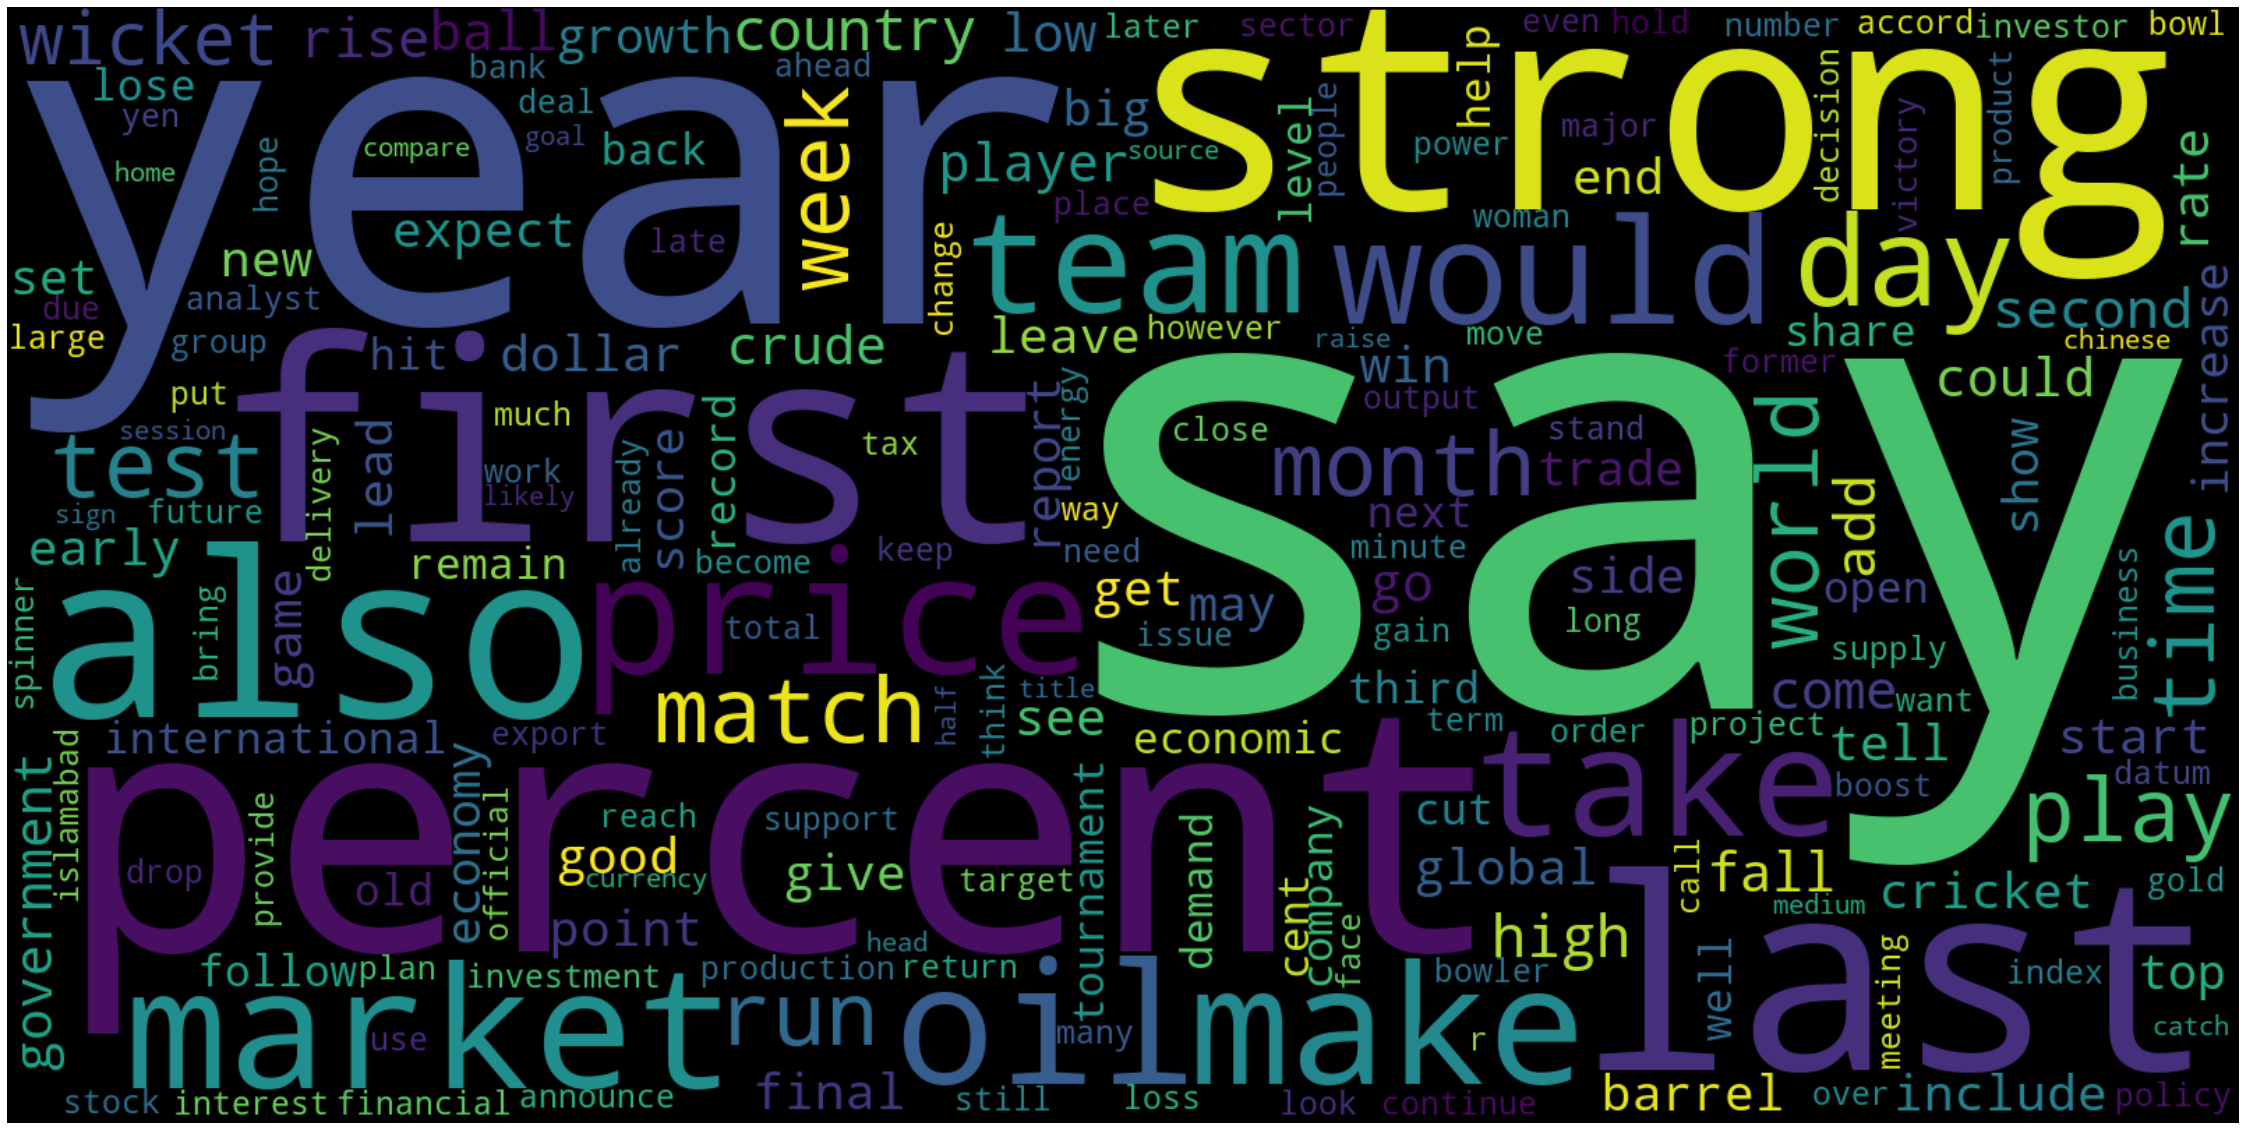

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width=1600, height=800)


wordcloud.generate_from_frequencies(frequencies=word_freq)

mpl.rcParams['figure.figsize']=(40.0,30.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=3000             #72 
mpl.rcParams['figure.subplot.bottom']=.1 

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

## Ans (iv)
In this word cloud, a very noticable thing is there are lots of financial terms. LIke **percent, market, oil, interest**, etc. This clearly indicates that this dataset has a lot of data from 'business' domain.

Moreover, we can also see words like **Wicket, Ball, Bowl** in various places of this picture. This indicates that it has also data from sports domain. 